<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" />
    
    
### <font color='navy'> Modelos no lineales para pronósticos.

**Nombres:**
- Estudiante 1: Héctor César Ornelas León

**Fecha:** 7 de marzo del 2024.

**Expediente** : 738146 y .
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/hectoroleon/Tarea4_HCOrnelas_CIBarrios

# Tarea 4: Clase 11

## Enunciado de tarea

Terminar los demás numerales faltantes de este ejercicio (clase 11).

### Código de solución estudiante 1

El objetivo para es este dataset es el siguiente:
1. Construir una red neuronal MLP univariada. Para esto, escoger la variable que más tenga correlación con la variable de salida.
2. Construir una red neuronal MLP multivariada. Para esto, tomar todas las variables incluidas en nuestro dataset.
3. Construir una red neuronal MLP multivariada, pero en este caso sólo considerar las variables adecuadas y descartar aquellas que no aportan mucha información o que son redundantes para cuantificar el efecto de estas variables redundantes.

**Nota**: Para poder saber cuales variables incluir en el modelo y cuales rechazar una opción es analizar la correlación de Pearson y la otra usando pruebas estadísticas con las siguientes paqueterías
```
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
```
> Luego del paso 3, crear el mismo modelo pero en este caso implementar técnicas de regularización `EarlyStopping` y `dropout`. Investigar como se pueden implementar estas estrategias en tensorflow.

Ya que el EDA y el punto 1 ya han sido desarrollados durante la clase 11, se continuará con el punto 2.

In [25]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [26]:
# Cargar los datos de entrenamiento y prueba
(train_data, train_labels), (test_data, test_labels) = keras.datasets.boston_housing.load_data()

In [27]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [28]:
# Analizar la data completa
columns = [
    'CRIM',
    'ZN',
    'INDUS',
    'CHAS',
    'NOX',
    'RM',
    'AGE',
    'DIS',
    'RAD',
    'TAX',
    'PTRATIO',
    'B',
    'LSTAT',
    'MEDV',
]

X = np.vstack([train_data, test_data])
y = np.hstack([train_labels, test_labels]).reshape(-1, 1)
data = pd.DataFrame(np.concatenate((X, y), axis=1), columns=columns)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78,24.1
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71,26.7


In [29]:
# Normalizar los datos de entrenamiento y prueba
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [30]:
train_data.shape

(404, 13)

### Punto 2

In [31]:
tf.random.set_seed(37)

# Definir la arquitectura de la red neuronal
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                896       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 7681 (30.00 KB)
Trainable params: 7681 (30.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_fit = model.fit(
    train_data, train_labels,
    validation_split=0.2,
    shuffle=False,
    epochs=50,
    batch_size=32,
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

4/4 [==============================] - 0s 3ms/step - loss: 27.9056 - mae: 3.1158
Error cuadrático medio en el conjunto de prueba: 27.905582427978516
Error absoluto medio en el conjunto de prueba: 3.115795612335205


In [33]:
model_fit.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

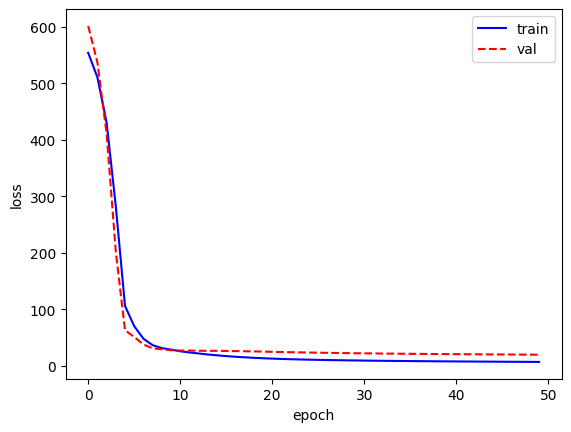

In [34]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_fit.history['loss'], 'b', label='train')
plt.plot(model_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

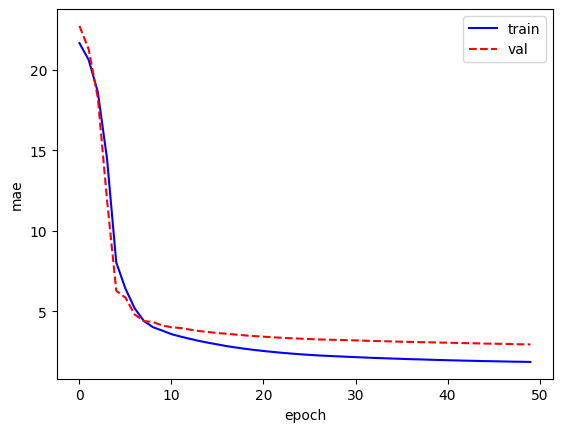

In [35]:
# Graficar el error
plt.plot(model_fit.history['mae'], 'b', label='train')
plt.plot(model_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

In [36]:
predicted = model.predict(test_data)

4/4 [==============================] - 0s 3ms/step


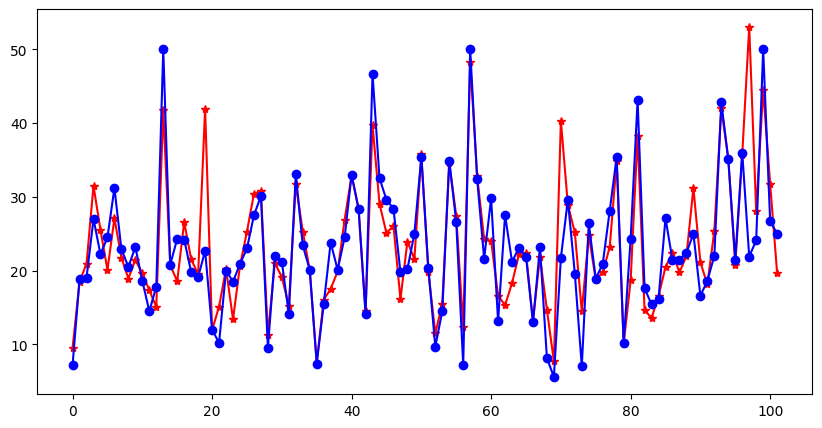

In [37]:
# Graficar las predicciones
plt.figure(figsize=(10,5))
plt.plot(predicted, 'r*-', label='prediction')
plt.plot(test_labels, 'bo-', label='test labels')

### Punto 3

Considerando las variables adecuadas.

In [38]:
from sklearn.feature_selection import SelectKBest

In [39]:
# Tomaremos 5 variables para el siguiente modelo utilizado SelectKBest
kbest = SelectKBest(k = 5)
kbest.fit(train_data, train_labels)
kbest

SelectKBest(k=5)

In [40]:
kbest.get_support()

array([ True, False, False, False, False,  True, False, False, False,
        True, False,  True,  True])

In [41]:
train_best = kbest.transform(train_data)
test_best = kbest.transform(test_data)

In [42]:
tf.random.set_seed(37)

# Definir la arquitectura de la red neuronal
model_1 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_best.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                384       
                                                                 
 dense_11 (Dense)            (None, 64)                4160      
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7169 (28.00 KB)
Trainable params: 7169 (28.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# Compilar el modelo
model_1.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_1_fit = model_1.fit(
    train_best, train_labels,
    validation_split=0.2,
    shuffle=False,
    epochs=100,
    batch_size=32,
    verbose=0
)

# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model_1.evaluate(test_best, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 18.9373 - mae: 3.0698
Error cuadrático medio en el conjunto de prueba: 18.93732452392578
Error absoluto medio en el conjunto de prueba: 3.069782257080078


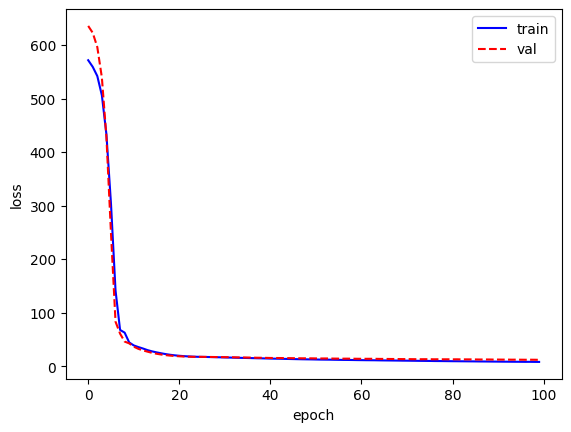

In [44]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_1_fit.history['loss'], 'b', label='train')
plt.plot(model_1_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

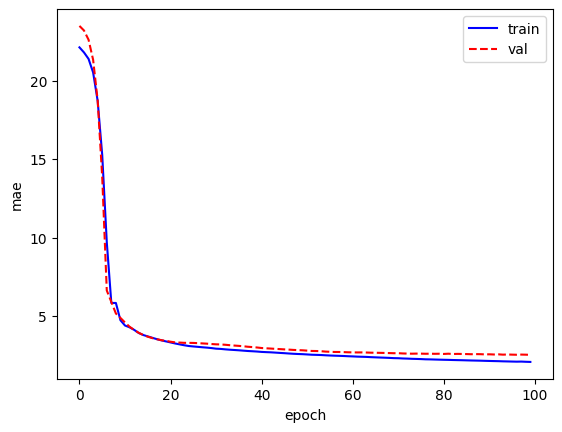

In [45]:
# Graficar métricas de error
plt.plot(model_1_fit.history['mae'], 'b', label='train')
plt.plot(model_1_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

In [47]:
predicted = model_1.predict(test_best)

4/4 [==============================] - 0s 3ms/step


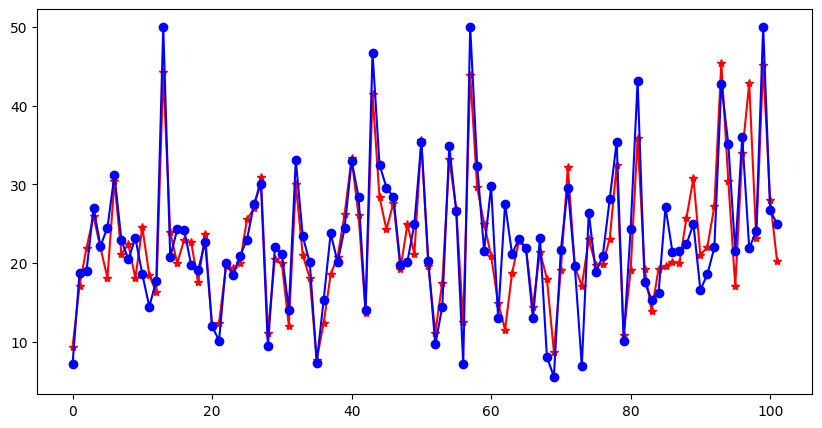

In [48]:
# Graficar las predicciones
plt.figure(figsize=(10,5))
plt.plot(predicted, 'r*-', label='prediction')
plt.plot(test_labels, 'bo-', label='test labels')

Agregaremos un paso 4 donde se creará el mismo modelo que en paso 3, pero utilizando EarlyStopping y Dropout para regularizar.

### Paso 4

In [49]:
Early_Stopping = keras.callbacks.EarlyStopping(patience = 8, restore_best_weights=True)

In [50]:
tf.random.set_seed(37)

# Definir la arquitectura de la red neuronal
model_2 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(train_best.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                384       
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 16)                528       
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7169 (28.00 KB)
Trainable params: 7169 (

In [51]:
# Compilar el modelo
model_2.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
# argumentos: validation_split, shuffle, epochs, verbose
model_2_fit = model_2.fit(
    train_best, train_labels,
    validation_split=0.2,
    shuffle=False,
    epochs=500,
    batch_size=32,
    callbacks = [Early_Stopping]
)

Epoch 1/500
11/11 [==============================] - 1s 25ms/step - loss: 557.9096 - mae: 21.7561 - val_loss: 612.5435 - val_mae: 22.9669
Epoch 2/500
11/11 [==============================] - 0s 7ms/step - loss: 523.9754 - mae: 20.9375 - val_loss: 568.0260 - val_mae: 21.9851
Epoch 3/500
11/11 [==============================] - 0s 7ms/step - loss: 468.7849 - mae: 19.6064 - val_loss: 489.5383 - val_mae: 20.2539
Epoch 4/500
11/11 [==============================] - 0s 7ms/step - loss: 383.5447 - mae: 17.4386 - val_loss: 357.8630 - val_mae: 17.0766
Epoch 5/500
11/11 [==============================] - 0s 7ms/step - loss: 248.9610 - mae: 13.8333 - val_loss: 179.7446 - val_mae: 11.9852
Epoch 6/500
11/11 [==============================] - 0s 6ms/step - loss: 101.3158 - mae: 8.1883 - val_loss: 50.2629 - val_mae: 5.1780
Epoch 7/500
11/11 [==============================] - 0s 7ms/step - loss: 68.4371 - mae: 6.2331 - val_loss: 34.8332 - val_mae: 4.3287
Epoch 8/500
11/11 [============================

In [52]:
# Evaluar el modelo en el conjunto de prueba
test_mse_score, test_mae_score = model_2.evaluate(test_best, test_labels)
print('Error cuadrático medio en el conjunto de prueba:', test_mse_score)
print('Error absoluto medio en el conjunto de prueba:', test_mae_score)

4/4 [==============================] - 0s 4ms/step - loss: 28.9573 - mae: 3.6827
Error cuadrático medio en el conjunto de prueba: 28.95726776123047
Error absoluto medio en el conjunto de prueba: 3.682697057723999


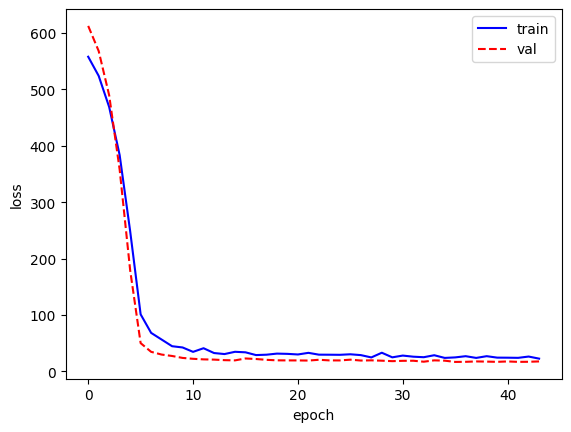

In [53]:
# Graficar el loss del conjunto de entrenamiento y de validación
plt.plot(model_2_fit.history['loss'], 'b', label='train')
plt.plot(model_2_fit.history['val_loss'], 'r--', label='val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

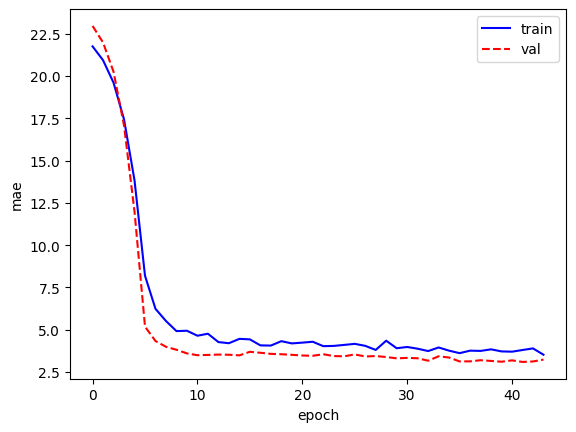

In [54]:
# Graficar métricas de error
plt.plot(model_2_fit.history['mae'], 'b', label='train')
plt.plot(model_2_fit.history['val_mae'], 'r--', label='val')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend()

In [56]:
predicted = model_2.predict(test_best)

4/4 [==============================] - 0s 5ms/step


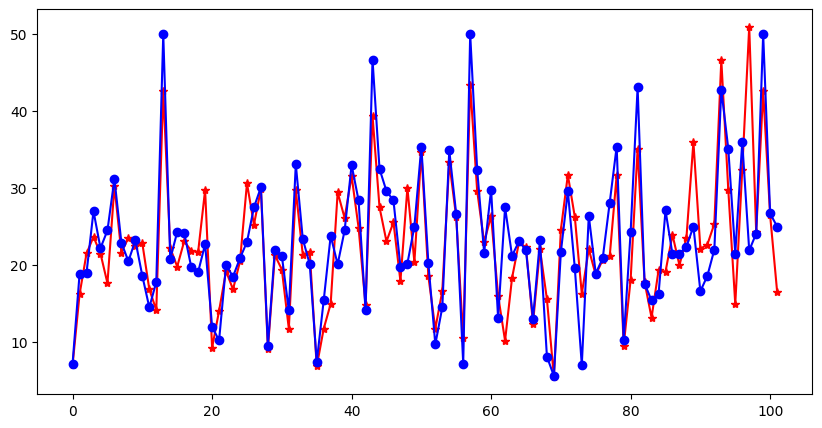

In [57]:
# Graficar las predicciones
plt.figure(figsize=(10,5))
plt.plot(predicted, 'r*-', label='prediction')
plt.plot(test_labels, 'bo-', label='test labels')

### Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2

